In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [55]:
# Extract data
route = 20
station = 19
data = pd.read_csv("Data/Cleaned_data.csv")
y = data[(data['visualiseringskode'] == route) & (data['station'] == station)]['togpunktlighed'].values
X = data[(data['visualiseringskode'] == route) & (data['station'] == station)].iloc[:,2:]

# Shift
y = y[4:]
X = X.iloc[:-4, :]
#print(y.shape, X.shape)

In [56]:
# Data prep
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

# Reshape X for LSTM (samples, time_steps, features)
time_steps = 1
X_reshaped = X_scaled.reshape((int(X_scaled.shape[0]/3), time_steps, X_scaled.shape[1]))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42, shuffle=False)


ValueError: cannot reshape array of size 538683 into shape (851,1,211)

In [50]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

time_steps = 30

# Create sequences
def create_sequences(X, y, time_steps):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X[i:i + time_steps])
        y_seq.append(y[i + time_steps])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X_scaled, y, time_steps)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)


In [51]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(time_steps, X_reshaped.shape[2])))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred = model.predict(X_test)

Epoch 1/20


/Users/clarasofiechristiansen/anaconda3/envs/DSB_Tensorflow/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.2179 - val_loss: 0.0145
Epoch 2/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0106 - val_loss: 0.0127
Epoch 3/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0090 - val_loss: 0.0103
Epoch 4/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0081 - val_loss: 0.0097
Epoch 5/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0075 - val_loss: 0.0097
Epoch 6/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0073 - val_loss: 0.0094
Epoch 7/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0068 - val_loss: 0.0090
Epoch 8/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0065 - val_loss: 0.0086
Epoch 9/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0069 - val_loss: 0.0084
Epoch 10/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0063 - val_loss: 0.0088
Epoch 11/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0067 - val_loss: 0.0092
Epoch 12/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0067 - val_l

In [52]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.07068801735698586


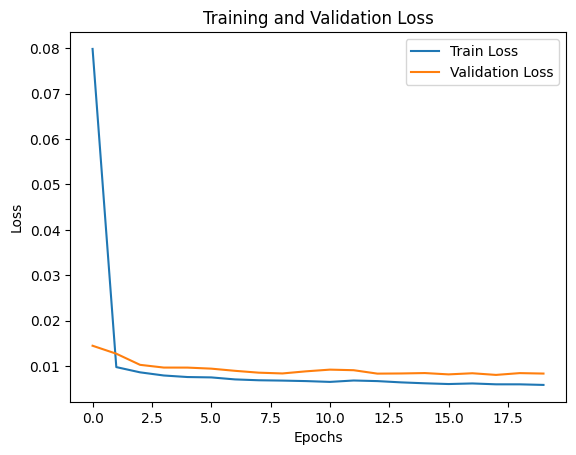

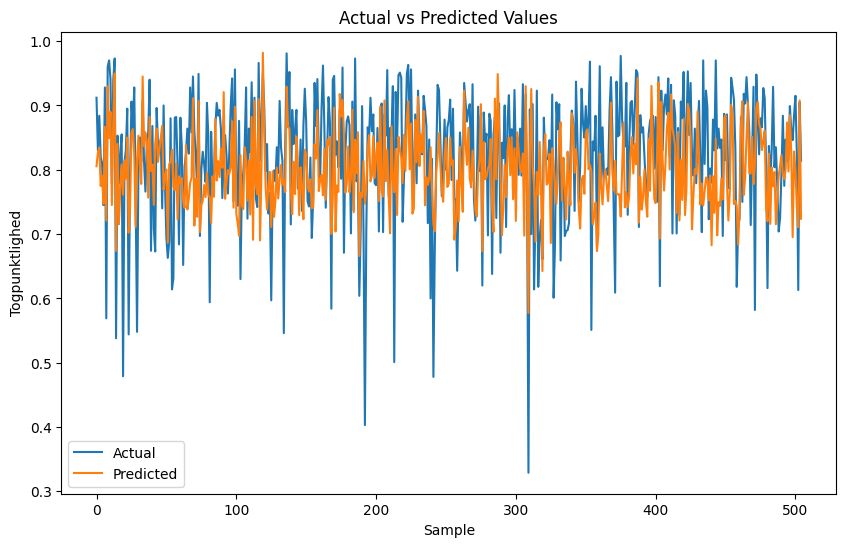

In [53]:
# Plot results
# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Togpunktlighed')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()